<a href="https://colab.research.google.com/github/xdmitriy/go-validator-ru-translation/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_3_%D0%97%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%81%D1%82%D0%B2%D0%BE_%D1%81_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в обработку и анализ данных. Знакомство с Pandas

## План урока



1. Знакомство с библиотекой pandas
2. Основные структуры данных в pandas: Series
3. Основные структуры данных в pandas: DataFrame
4. Арифметические операции
5. Агрегатные методы
6. Фильтрация данных
7. Экспорт и импорт данных
8. Практический кейс

## Знакомство с библиотекой pandas

#### Немного о библиотеке




**Pandas** является наиболее продвинутой и быстроразвивающейся библиотекой для анализа данных и их предобработки.

<img src ="https://ded9.com/wp-content/uploads/2020/12/python-pandas-install-cover-scaled-1.jpg" width="500" height="400" align="right">

* Данная библиотека построена поверх другой библиотеки NumPy, которая в свою очередь написана на языке С. Такая особенность дает большой скачок в производительности операций библиотеки.


* Еще одним большим плюсом Pandas является подробная документация с детальным описанием всех функций и примерами их использования. Более того, так как Pandas является очень популярной библиотекой, то вы практически всегда сможете найти ответ на интересующий вас вопрос в интернете, главное - это уметь правильно искать.

* Pandas хорошо интегрирован со всей экосистемой инструментов для Data Science, с ним работают все популярные пакеты и библиотеки для анализа данных и машинного обучения. Поэтому pandas является стандартом современного табличного Data Science и обязателен для изучения любому начинающего DS-у.





### Что умеет pandas?

Среди основных возможностей библиотеки, необходимых специалисту Data Science можно выделить следующие:
* Работа с различными форматами данных (csv, excel, json, sql и т.д.)
* Фильтрация данных (извлечение данных по условиям)
* Быстрые математические операции с таблицами и их столбцами
* Статистический анализ данных
* Использование методов статистического анализа
* Группировка данных и построение сводных таблиц
* Объединение несколько таблиц
* Встроенная визуализация (возможность построения графиков по данным)

### Установка pandas

In [ ]:
# !pip install pandas

**Примечание:**

Библиотека pandas, как и другие популярные DS библиотеки уже интегрированы в Google Colab, поэтому дополнительная установка не потребуется.

Импортируем библиотеку:

In [ ]:
import pandas as pd

pd.__version__

'2.0.3'

## Основные структуры: Pandas Series (1D)

[**Series**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) — это объект библиотеки pandas, спроектированный для представления одномерных структур данных, похожих на массивы, но с дополнительными возможностями.

Архитектурно Series состоит из двух связанных между собой массивов. Основной содержит данные, а в дополнительном, index, хранятся ассоциативные метки, по которым можно обращаться к данным и быстро получать значения.

<img src ="https://pythonru.com/wp-content/uploads/2020/05/struktura-obekta-series.png" width="200">

#### Создание Series

Объекты типа Series поддерживают несколько способов инициализации:
1. Из списков ключей и значений
2. Из словаря с ключами и значениями

In [ ]:
# Серию можно создавать из списка
airports_series = pd.Series(
    data = ['Шереметьево', 'Домодедово', 'Внуково', 'Жуковский', 'Пулково', 'Минеральные Воды', 'Абакан'],
    index = ['SVO', 'DME', 'VKO', 'ZIA', 'LDE', 'MRV', 'ABA'],
    name = 'airports'
)
airports_series

SVO         Шереметьево
DME          Домодедово
VKO             Внуково
ZIA           Жуковский
LDE             Пулково
MRV    Минеральные Воды
ABA              Абакан
Name: airports, dtype: object

In [ ]:
# А можно из словаря
items_series = pd.Series({'Арбуз': 130, 'Вишня': 250, 'Малина': 230, 'Хлеб': 78, 'Молоко': 109, 'Творог': 94}, name='Товары')
items_series

Арбуз     130
Вишня     250
Малина    230
Хлеб       78
Молоко    109
Творог     94
Name: Товары, dtype: int64

In [ ]:
# Посмотрим на типы данных созданных объектов
print(type(airports_series))
print(type(items_series))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Основные атрибуты Series

In [ ]:
# Индексы
print(airports_series.index)

Index(['SVO', 'DME', 'VKO', 'ZIA', 'LDE', 'MRV', 'ABA'], dtype='object')


In [ ]:
# Значения
print(airports_series.values)

['Шереметьево' 'Домодедово' 'Внуково' 'Жуковский' 'Пулково'
 'Минеральные Воды' 'Абакан']


In [ ]:
# Тип данных
print(airports_series.dtypes)

object


#### Доступ к данным в Series

Доступ к элементам осуществляется с использованием loc или iloc:
* [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html) вызывается с квадратными скобками, в которые передаются метки. В него можно передать как один индекс, так и список, чтобы получилось несколько элементов.
* [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html) также вызывается с квадратными скобками и принимает на вход порядковые номера элементов Series (нумерация начинаются с 0). В него можно так же передавать как один индекс, так и диапазон чисел.

In [ ]:
print(airports_series.loc['DME'])

Домодедово


In [ ]:
print(airports_series.loc[['SVO', 'DME', 'VKO', 'ZIA']])

SVO    Шереметьево
DME     Домодедово
VKO        Внуково
ZIA      Жуковский
Name: airports, dtype: object


In [ ]:
print(airports_series.iloc[6])

Абакан


In [ ]:
print(airports_series.iloc[1:4])

DME    Домодедово
VKO       Внуково
ZIA     Жуковский
Name: airports, dtype: object


На самом деле loc и iloc можно опустить и обращаться к элементам Series напрямую по индексам, например:

In [ ]:
airports_series[['SVO', 'DME', 'VKO', 'ZIA']]

SVO    Шереметьево
DME     Домодедово
VKO        Внуково
ZIA      Жуковский
Name: airports, dtype: object

In [ ]:
airports_series[[0, 2, 4]]

SVO    Шереметьево
VKO        Внуково
LDE        Пулково
Name: airports, dtype: object

Оба варианта являются равноправными для Series, однако в дальнейшем мы будем использовать эти операции при обращении к более сложной структуре — DataFrame, а в контексте этой структуры эти варианты уже неравноправны.

#### Арифметические операции в Series

Для выполнения арифметических операций с Series (столбцами) не нужно реализовывать циклы. Сложение, вычитание, умножение, деление и прочие операции между Series и числами выполняются стандартными операторами "+", "-", "*" и "/".

Пример:

In [ ]:
items_series

Арбуз     130
Вишня     250
Малина    230
Хлеб       78
Молоко    109
Творог     94
Name: Товары, dtype: int64

In [ ]:
exchange_rate = 92.61
new_items_series = items_series / exchange_rate
new_items_series

Арбуз     1.403736
Вишня     2.699492
Малина    2.483533
Хлеб      0.842242
Молоко    1.176979
Творог    1.015009
Name: Товары, dtype: float64

In [ ]:
items_series

Арбуз     130
Вишня     250
Малина    230
Хлеб       78
Молоко    109
Творог     94
Name: Товары, dtype: int64

Аналогичные операции можно выполнить между несколькими объектами Series, главное, чтобы они были одинакового размера:

In [ ]:
# Скидки на товары
sales = pd.Series({'Арбуз': 10, 'Вишня': 24, 'Малина': 0, 'Хлеб': 15, 'Молоко': 10, 'Творог': 13}, name='Скидки')

# Вычисляем финальную стоимость
results = items_series - sales

results

Арбуз     120
Вишня     226
Малина    230
Хлеб       63
Молоко     99
Творог     81
dtype: int64

#### Агрегатные методы в Series

Наиболее распространенными методами для Series являются всевозможные агрегации.

Агрегрегатным называется метод, который для столбца возвращает только одно значение - показатель. Например, вычисление медины, максимума, среднего и так далее.

Наиболее популярные методы:

    .count() - количество непустых значений
    .mean() - среднее значение
    .min() - минимальное значение
    .max() - максимальное значение
    .deviance() - дисперсия
    .std() - стандартное отклонение
    .sum() - сумма
    .quantile(x) -квантиль уровня x
    .argmax() - возвращает индекс строки с максимальным значением
    .argmin() - возвращает индекс строки с минимальным значением
    .describe() - возвращает всю описательную статистику по столбцу


Полный список методов Series на все случаи жизни можно найти в [документации](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [ ]:
# рассчет средней стоимости товаров
items_series.mean()

148.5

In [ ]:
# рассчет стандартного отклонения товаров
items_series.std()

73.19494518066121

In [ ]:
# рассчет суммарной стоимости
items_series.sum()

891

In [ ]:
# поиск товара с наименьшей стоимостью
min_idx = items_series.argmin()
print('Индекс:', min_idx)
print('Цена:', items_series[min_idx])

Индекс: 3
Цена: 78


In [ ]:
# описательная статистика по столбцу
items_series.describe()

count      6.000000
mean     148.500000
std       73.194945
min       78.000000
25%       97.750000
50%      119.500000
75%      205.000000
max      250.000000
Name: Товары, dtype: float64

#### Фильтрация данных в Series

Часто бывает ситуация, что нам нужно исследовать определенную группу наших объектов по какому-то условию, например найти товары с ценой менее 100.

Разберем классический способ фильтрации в Series с помощью масок.

**Маской** называется Series, которая состоит из булевых значений, при этом значения True соответствуют тем индексам, для которых заданное условие выполняется, в противном случае ставится значение False (например, цена < 100 ).

Синтаксис создания маски очень прост:

In [ ]:
items_series < 100

Арбуз     False
Вишня     False
Малина    False
Хлеб       True
Молоко    False
Творог     True
Name: Товары, dtype: bool

Для фильтрации полученная маска просто подставляется в оператор индексации:

In [ ]:
items_series[items_series < 100]

Хлеб      78
Творог    94
Name: Товары, dtype: int64

In [ ]:
items_series[items_series >= 150]

Вишня     250
Малина    230
Name: Товары, dtype: int64

In [ ]:
items_series[items_series == 109]

Молоко    109
Name: Товары, dtype: int64

Условия можно и комбинировать, используя операторы & (логическое и) и | (логическое или). Условия при этом заключаются в скобки.

In [ ]:
items_series >= 100

Арбуз      True
Вишня      True
Малина     True
Хлеб      False
Молоко     True
Творог    False
Name: Товары, dtype: bool

In [ ]:
items_series <= 150

Арбуз      True
Вишня     False
Малина    False
Хлеб       True
Молоко     True
Творог     True
Name: Товары, dtype: bool

In [ ]:
# Товары, цена которых в диапазоне от 100 до 150 (включительно)
items_series[(items_series >= 100) & (items_series <= 150)]

Арбуз     130
Молоко    109
Name: Товары, dtype: int64

In [ ]:
# Товары, цена которых либо меньше 100, либо более 200
a = items_series[(items_series < 100) | (items_series > 200)]
a

Вишня     250
Малина    230
Хлеб       78
Творог     94
Name: Товары, dtype: int64

Фильтрация легко совмещается с агрегацией:

In [ ]:
# Средняя цена товаров, чья стоимость от 100 до 150 (включительно)
items_series[(items_series >= 100) & (items_series <= 150)].mean()

119.5

##### Задания по Series

В аптеку поступают поставки лекарств. Их названия находятся в списке names, количество единиц товара находятся в списке counts.

Например:
* `items=['Хлор-гексидин', 'Синтомицин', 'Афобазол', 'Парацетомол']`
* `counts=[16, 32, 45, 9]`

Создайте Series medications, индексами которой являются названия лекарств names, а значениями - их количество в поставке counts.


Выполните задания:

* Расчитайте суммарное количество поставленного товара
* Рассчитайте среднее количество поставленного товара
* Выведите товар с максимальным объемом поставки



## Основные структуры: Pandas DataFrame (2D)

Наиболее популярным и понятным является табличное представление данных и для работы с такими данными в Pandas существует объект DataFrame.

**DataFrame** - двумерная структура, представляемая в виде таблицы, в которой есть строки и столбцы.

DataFrame состоит из набора упорядоченных колонок (объектов Series), а строки таблицы формируются из их элементов.

Также в DataFrame есть метки (индексы), которые соответствуют каждой строке таблицы.


<img src ="https://pythonru.com/wp-content/uploads/2020/05/struktura-dataframe.png" width="300">


#### Создание DataFrame

In [ ]:
# из словаря
credits_df = pd.DataFrame(
    {
        'ФИО': ['Иванов И.И', 'Авербух А.В', 'Вестяк А.В'],
        'Возраст': [32, 28, 86],
        'Доход': [120, 44, 250],
        'Размер кредита': [250, 320, 500]
    }
)
credits_df

,ФИО,Возраст,Доход,Размер кредита
0,Иванов И.И,32,120,250
1,Авербух А.В,28,44,320
2,Вестяк А.В,86,250,500


In [ ]:
# из списка
airport_df = pd.DataFrame(
    [
        ['Шереметьево', 36.60, 29, 'Москва'],
        ['Домодедово', 19.9, -6, 'Москва'],
        ['Внуково', 14.5, -11, 'Москва'],
        ['Жуковский', 1.450, 4, 'Москва'],
        ['Пулково', 20.4, 12, 'Санкт-Петербург'],
        ['Минеральные Воды', 4.789, 17, 'Минеральные Воды'],
        ['Абакан', 0.371, 15, 'Абакан']
    ],
    columns=["Аэропорт", "Пассажиропоток", "Разница с предыдущим годом (%)", "Город"]
)

airport_df

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%),Город
0,Шереметьево,36.600,29,Москва
1,Домодедово,19.900,-6,Москва
2,Внуково,14.500,-11,Москва
3,Жуковский,1.450,4,Москва
4,Пулково,20.400,12,Санкт-Петербург
5,Минеральные Воды,4.789,17,Минеральные Воды
6,Абакан,0.371,15,Абакан


***Примечание:***

Цифры по аэропортам взяты [отсюда](https://ru.wikipedia.org/wiki/Список_наиболее_загруженных_аэропортов_России#2023_год).

In [ ]:
print(type(credits_df))
print(type(airport_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


#### Основные атрибуты DataFrame:

Посмотрим на размер данных, названия признаков и их типы.

Для этого у любого DataFrame есть атрибуты:
* shape - кортеж вида (кол-во строк, кол-во столбцов)
* columns - список с наименованием столбцов
* values - массив (numpy array) со значениями в таблице
* dtypes - массив с информацией о типах данных столбцов

In [ ]:
print(airport_df.shape)

(7, 4)


In [ ]:
# Столбцы
print(airport_df.columns)

Index(['Аэропорт', 'Пассажиропоток', 'Разница с предыдущим годом (%)',
       'Город'],
      dtype='object')


In [ ]:
# Индексы
print(airport_df.index)

RangeIndex(start=0, stop=7, step=1)


In [ ]:
# Значения
print(airport_df.values)

[['Шереметьево' 36.6 29 'Москва']
 ['Домодедово' 19.9 -6 'Москва']
 ['Внуково' 14.5 -11 'Москва']
 ['Жуковский' 1.45 4 'Москва']
 ['Пулково' 20.4 12 'Санкт-Петербург']
 ['Минеральные Воды' 4.789 17 'Минеральные Воды']
 ['Абакан' 0.371 15 'Абакан']]


In [ ]:
# Типы данных
print(airport_df.dtypes)

Аэропорт                           object
Пассажиропоток                    float64
Разница с предыдущим годом (%)      int64
Город                              object
dtype: object


#### Доступ к данным в DataFrame

Срезы данных из DataFrame можно получать несколькими способами:
* Обращением к столбцу через оператор индексации, с дальнейшим извлечением данных по индексу строки


In [ ]:
airport_df['Пассажиропоток']

0    36.600
1    19.900
2    14.500
3     1.450
4    20.400
5     4.789
6     0.371
Name: Пассажиропоток, dtype: float64

In [ ]:
airport_df['Пассажиропоток'][1:3]

1    19.9
2    14.5
Name: Пассажиропоток, dtype: float64

In [ ]:
print(type(airport_df['Пассажиропоток']))

<class 'pandas.core.series.Series'>


* Обращение к строкам и столбцам помощью [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) и [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [ ]:
airport_df.loc[0, 'Пассажиропоток']

36.6

In [ ]:
airport_df.iloc[0, 1]

36.6

In [ ]:
airport_df.loc[0:2, ['Аэропорт', 'Пассажиропоток']]

,Аэропорт,Пассажиропоток
0,Шереметьево,36.6
1,Домодедово,19.9
2,Внуково,14.5


In [ ]:
airport_df.iloc[3:6, 1:3]

,Пассажиропоток,Разница с предыдущим годом (%)
3,1.450,4
4,20.400,12
5,4.789,17


## Арифметические операции с DataFrame

Так как столбцы в DataFrame являются объектами Series, то с ними можно также производить аналогичные арифметические операции с помощью стандартных операторов Python.

In [ ]:
airport_df['Пассажиропоток']

0    36.600
1    19.900
2    14.500
3     1.450
4    20.400
5     4.789
6     0.371
Name: Пассажиропоток, dtype: float64

In [ ]:
# Пассажиропоток по аэропортам в день в кол-ве человек
(airport_df['Пассажиропоток'] * 1000000) / 365

0    100273.972603
1     54520.547945
2     39726.027397
3      3972.602740
4     55890.410959
5     13120.547945
6      1016.438356
Name: Пассажиропоток, dtype: float64

In [ ]:
airport_df

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%),Город
0,Шереметьево,36.600,29,Москва
1,Домодедово,19.900,-6,Москва
2,Внуково,14.500,-11,Москва
3,Жуковский,1.450,4,Москва
4,Пулково,20.400,12,Санкт-Петербург
5,Минеральные Воды,4.789,17,Минеральные Воды
6,Абакан,0.371,15,Абакан


In [ ]:
# Прирост/убыток пассажиров по сравнению с предыдущим годом (в млн. человек)
airport_df['Пассажиропоток'] * airport_df['Разница с предыдущим годом (%)'] / 100

0    10.61400
1    -1.19400
2    -1.59500
3     0.05800
4     2.44800
5     0.81413
6     0.05565
dtype: float64

In [ ]:
airport_df['Прирост в шт.'] = airport_df['Пассажиропоток'] * airport_df['Разница с предыдущим годом (%)'] / 100
airport_df

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%),Город,Прирост в шт.
0,Шереметьево,36.600,29,Москва,10.61400
1,Домодедово,19.900,-6,Москва,-1.19400
2,Внуково,14.500,-11,Москва,-1.59500
3,Жуковский,1.450,4,Москва,0.05800
4,Пулково,20.400,12,Санкт-Петербург,2.44800
5,Минеральные Воды,4.789,17,Минеральные Воды,0.81413
6,Абакан,0.371,15,Абакан,0.05565


## Агрегатные методы в DataFrame

Агрегация в DataFrame производится аналогично агрегациям в Series.

In [ ]:
# Среднее по всем числовым столбцам
airport_df.mean(numeric_only=True)

Пассажиропоток                    14.001429
Разница с предыдущим годом (%)     8.571429
Прирост в шт.                      1.600111
dtype: float64

In [ ]:
# Максимальные значения по всем числовым столбцам
airport_df.max(numeric_only=True)

Пассажиропоток                    36.600
Разница с предыдущим годом (%)    29.000
Прирост в шт.                     10.614
dtype: float64

In [ ]:
# Агрегация по конкретным столбцам
airport_df['Пассажиропоток'].mean()

14.001428571428571

In [ ]:
# Описательная статистика по всем числовым столбцам
airport_df.describe(include='object')

,Аэропорт,Город
count,7,7
unique,7,4
top,Шереметьево,Москва
freq,1,4


## Фильтрация данных в DataFrame

Фильтрация в DataFrame аналогичная фильтрации в Series за исключением того, что в фильтрации могут принимать условия, наложенные сразу на несколько столбцов таблицы.

In [ ]:
airport_df['Пассажиропоток'] > 10

0     True
1     True
2     True
3    False
4     True
5    False
6    False
Name: Пассажиропоток, dtype: bool

In [ ]:
# Аэропорты с пассажиропотоком более 10 млн. человек в год:
airport_df[airport_df['Пассажиропоток'] > 10]

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%),Город,Прирост в шт.
0,Шереметьево,36.6,29,Москва,10.614
1,Домодедово,19.9,-6,Москва,-1.194
2,Внуково,14.5,-11,Москва,-1.595
4,Пулково,20.4,12,Санкт-Петербург,2.448


In [ ]:
# Аэропорты московского аэроузла (МАУ)
airport_df[(airport_df['Город'] == 'Москва')]

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%),Город,Прирост в шт.
0,Шереметьево,36.60,29,Москва,10.614
1,Домодедово,19.90,-6,Москва,-1.194
2,Внуково,14.50,-11,Москва,-1.595
3,Жуковский,1.45,4,Москва,0.058


In [ ]:
# Аэропорты, у которых прирост за год отрицательный:
airport_df[airport_df['Разница с предыдущим годом (%)'] < 0]

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%),Город,Прирост в шт.
1,Домодедово,19.9,-6,Москва,-1.194
2,Внуково,14.5,-11,Москва,-1.595


In [ ]:
# Аэропорты с пассажиропотоком от 10 до 20 млн. человек в год:
airport_df[(airport_df['Пассажиропоток'] >= 10) & (airport_df['Пассажиропоток'] <= 20)]

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%),Город,Прирост в шт.
1,Домодедово,19.9,-6,Москва,-1.194
2,Внуково,14.5,-11,Москва,-1.595


In [ ]:
# Средний пассажиропоток МАУ
airport_df[(airport_df['Город'] == 'Москва')]['Пассажиропоток'].mean()

18.1125

In [ ]:
# Аэропорты не из МАУ, у которых пассажиропоток не ниже среднего
mean_paxflow = airport_df['Пассажиропоток'].mean()
airport_df[(airport_df['Город'] != 'Москва') & (airport_df['Пассажиропоток'] >= mean_paxflow)]

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%),Город,Прирост в шт.
4,Пулково,20.4,12,Санкт-Петербург,2.448


#### Axis в DataFrame

Как уже было сказано, DataFrame является двумерной структурой данных, что означает наличие двух возможных направлений движения в ней: вдоль строк и вдоль столбцов.

При работе с Pandas важно уметь указывать направление работы метода, который используется. Для этого вводится понятие axis (ось, координата). Движение по строкам в таблице обозначается axis с индексом 0, а движение по столбцам — axis с индексом 1.

Данный параметр заложен во все методы, которые могут работать в двух направлениях и по умолчанию в большинстве из них axis=0, то есть они выполняют операции со строками, если не задавать axis вручную.

<img src=https://i.stack.imgur.com/dcoE3.jpg width="500">


In [ ]:
# Среднее по строкам
airport_df['Пассажиропоток'].mean()

14.001428571428571

In [ ]:
# Среднее по столбцам
airport_df[['Пассажиропоток', 'Разница с предыдущим годом (%)']].mean(axis=1)

0    32.8000
1     6.9500
2     1.7500
3     2.7250
4    16.2000
5    10.8945
6     7.6855
dtype: float64

##### Задания по DataFrame

Ваша задача проанализировать чистую прибыль - разницу между расходами и доходами некоторой компании за определенный год.

Доходы (income), расходы(expenses), и года (years) соответствующие им предоставлены вам в виде списков:
* `income = [478, 512, 196, 124, 783, 356, 256]`
* `expenses = [156, 130, 270, 245, 536, 531, 178]`
* `years = [2018, 2019, 2020, 2021, 2022, 2023]`

Составьте   DataFrame из входных данных со столбцами “Income” и “Expenses” и индексами, соответствующим годам рассматриваемого периода.

1. Создайте столбец diff, в котором будет указана разница между доходами и расходами компании за каждый код
2. Вычислите минимальную, максимальную и среднюю разницы между доходами и расходами

3. Найдите год, в котором разница между доходами и расходами минимальна


## Экспорт и импорт данных

При работе Data Scientist чаще всего сталкивается с уже собранными данными, хранящимися в виде файлов и других источников, таких как базы данных и web-источники.

Проблема заключается в том, что каждый источник данных представляет разных формат: например, если данные приходят к вам из отдела бухгалтерии, то это, скорее всего будет формат Excel-таблицы,  результаты web-запросов чаще всего представлены в формате JSON или XML и так далее.

Благодаря функциональности Pandas можно быстро и легко читать (импортировать) данные и преобразовывать их в DataFrame из самых распространенных форматов. При этом данные могут быть прочитаны с вашего диска или же по сети.

Более того, раз данные можно прочитать, значит их можно и сохранить (экспортировать), для этого Pandas также предоставляет возможности.


In [ ]:
airport_df = pd.DataFrame({
    'Аэропорт': ['Шереметьево', 'Домодедово', 'Внуково', 'Жуковский', 'Пулково', 'Минеральные Воды', 'Абакан'],
    'Пассажиропоток': [36.60, 19.9, 14.5, 1.450, 20.4, 4.789, 0.371],
    'Разница с предыдущим годом (%)': [29, -6, -11, 4, 12, 17, 15]
})
airport_df

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%)
0,Шереметьево,36.600,29
1,Домодедово,19.900,-6
2,Внуково,14.500,-11
3,Жуковский,1.450,4
4,Пулково,20.400,12
5,Минеральные Воды,4.789,17
6,Абакан,0.371,15


In [ ]:
airport_df.to_csv('airport_data.csv', index=False, sep=';')

Для чтения таблицы из csv файла используется функция модуля pandas [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Функция возвращает DataFrame и имеет несколько важных параметров:
* filepath_or_buffer - путь до файла, который мы читаем
* sep — разделитель данных (по умолчанию ',')
* decimal - разделитель чисел на целую и дробную часть в выходном файле (по умолчанию '.')
* names - список с названиями столбцов для чтения
* skiprows - количество строк в файле, которые нужно пропустить (например файл может содержать служебную информацию, которая нам не нужна)


In [ ]:
airport_df_readed = pd.read_csv('airport_data.csv', sep=';')
airport_df_readed

,Аэропорт,Пассажиропоток,Разница с предыдущим годом (%)
0,Шереметьево,36.600,29
1,Домодедово,19.900,-6
2,Внуково,14.500,-11
3,Жуковский,1.450,4
4,Пулково,20.400,12
5,Минеральные Воды,4.789,17
6,Абакан,0.371,15


Помимо csv Pandas способен работать со многими распространенными форматами данных. Ниже приведен список методов и документация по ним для записи таблиц в форматы, отличные от csv:
* [to_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html) - запись DataFrame в формат Excel-таблицы (.xslx).
* [to_json()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html) - запись DataFrame в формат JSON (.json)
* [to_xml()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_xml.html) - запись DataFrame в формат XML-документа (.xml)
* [to_sql()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html) - запись DataFrame в базу данных SQL (для реализации этого метода необходимо установить соединение с базой данных)

Аналогичный список методов и документация по ним для чтения таблиц из форматов, отличных от csv:
* [read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) - чтение из формата Excel-таблицы(.xslx) в DataFrame
* [read_json()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html) - чтение из формата JSON (.json) в DataFrame
* [read_xml()](https://pandas.pydata.org/docs/reference/api/pandas.read_xml.html) - чтение из формата XML-документа (.xml) в DataFrame
* [read_sql()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) - чтение из базы данных SQL в DataFrame (так же необходимо установить соединение с базой данных)


Помимо файлов pandas способен читать данные из открытых интернет источников, например с GitHub.

## Кейс: анализ товаров на Amazon

Дальнейшее рассмотрение базового функционала библиотеки продолжим на датасете о товарах нижнего белья на Amazon

[Источник данных](https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others?select=amazon_com.csv)


Загрузим исходные данные

In [ ]:
amazon_df = pd.read_csv('https://raw.githubusercontent.com/AndreyRysistov/VebinarDST/main/amazon_com_data.csv')

In [ ]:
type(amazon_df)

pandas.core.frame.DataFrame

In [ ]:
print('Количество строк: {}'.format(amazon_df.shape[0]))
print('Количество столбцов: {}'.format(amazon_df.shape[1]))
print('Список столбцов: ', list(amazon_df.columns))

Количество строк: 20000
Количество столбцов: 14
Список столбцов:  ['product_name', 'mrp', 'price', 'pdp_url', 'brand_name', 'product_category', 'retailer', 'description', 'rating', 'review_count', 'style_attributes', 'total_sizes', 'available_size', 'color']


Посмотрим на первые(последние) строки файла. Для этого используем метод [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

In [ ]:
amazon_df.tail(2)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
19998,Wacoal Women's Retro Chic Underwire Bra,$60.00,$60.00,https://www.amazon.com/-/dp/B002R9OYEU?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful low plunge chantilly lace bra with s...,4.4,753,"[ 82% Nylon/ 18% Spandex/Elastane , Imported ,...","30B , 30D , 32B , 32C , 32D , 32DD , 32DDD , 3...","30B , 30D , 32C , 32D , 32DD , 32DDD , 32G , 3...",Toast
19999,Wacoal Women's Body By Wacoal Underwire Bra,$46.00,$39.99,https://www.amazon.com/-/dp/B0066647DS?th=1&psc=1,Wacoal,Bras,Amazon US,Body by wacoal seamless underwire is sleek and...,4.4,280,[ Body: SUPPLEX® fabric - 87% nylon / 13% span...,"32C , 32D , 32DD , 34B , 34C , 34D , 34DD , 36...","32D , 32DD , 34B , 34C , 34D , 34DD , 36B , 36...",Black


In [ ]:
amazon_df.columns

Index(['product_name', 'mrp', 'price', 'pdp_url', 'brand_name',
       'product_category', 'retailer', 'description', 'rating', 'review_count',
       'style_attributes', 'total_sizes', 'available_size', 'color'],
      dtype='object')

Описание набора данных:

* product_name - название товара
* mrp - цена без скидки
* price - цена на сайте
* pdp_url - ссылка на товар
* brand_name - название бренда
* product_category - категория товара
* retailer - ретейлер
* description - описание
* rating - рейтинг товара
* review count - количество отзывов
* style attributes - состав товара
* total sizes - все размеры
* available size - доступные размеры
* color - цвет

Посмотрим на общую информацию по датасету. Для этого воспользуемся методом [`info`()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), который выводит:
- информацию о наименовании столбцов
- количестве НЕпустых значений
- типах данных
- занимаемый в оперативной памяти объем данных

In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      20000 non-null  object 
 1   mrp               20000 non-null  object 
 2   price             20000 non-null  object 
 3   pdp_url           20000 non-null  object 
 4   brand_name        20000 non-null  object 
 5   product_category  20000 non-null  object 
 6   retailer          20000 non-null  object 
 7   description       20000 non-null  object 
 8   rating            20000 non-null  float64
 9   review_count      20000 non-null  int64  
 10  style_attributes  20000 non-null  object 
 11  total_sizes       20000 non-null  object 
 12  available_size    20000 non-null  object 
 13  color             20000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.1+ MB


Посмотрим на столбцы таблички повнимательнее:

In [ ]:
amazon_df[['mrp', 'price']]

,mrp,price
0,$36.00,$32.40
1,$27.00,$27.00
2,$65.00,$65.00
3,$36.00,$36.00
4,$65.00,$65.00
...,...,...
19995,$65.00,$65.00
19996,$13.00,$9.10
19997,$38.00,$21.24
19998,$60.00,$60.00


Немного предобработаем данные: уберем символ "$" из столбцов с ценой до и после скидки (mrp и price), чтобы преобразовать эти столбцы в числовые типы данных:


In [ ]:
amazon_df['mrp'] = amazon_df['mrp'].str.replace('$', '').str.replace(' ', '').astype('float64')
amazon_df['price'] = amazon_df['price'].str.replace('$', '').str.replace(' ', '').astype('float64')
amazon_df.head(1)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare


In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      20000 non-null  object 
 1   mrp               20000 non-null  float64
 2   price             20000 non-null  float64
 3   pdp_url           20000 non-null  object 
 4   brand_name        20000 non-null  object 
 5   product_category  20000 non-null  object 
 6   retailer          20000 non-null  object 
 7   description       20000 non-null  object 
 8   rating            20000 non-null  float64
 9   review_count      20000 non-null  int64  
 10  style_attributes  20000 non-null  object 
 11  total_sizes       20000 non-null  object 
 12  available_size    20000 non-null  object 
 13  color             20000 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+ MB


Проведем базовый разведывательный анализ, вычислив основные характеристики по столбцам. Для этого воспользуемся методом [`describe()`](https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.describe.html).

In [ ]:
amazon_df.describe() #описание по числовым столбцам

,mrp,price,rating,review_count
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,48.307296,44.330868,4.273745,481.703650
std,13.916822,15.140556,0.224739,423.293379
min,7.510000,5.000000,2.900000,1.000000
25%,38.000000,34.200000,4.200000,107.000000
50%,50.000000,46.000000,4.300000,389.000000
75%,60.000000,56.975000,4.400000,755.000000
max,74.990000,74.990000,5.000000,1894.000000


По умолчанию метод describe() работает именно с числовыми столбцами (int и float), чтобы посчитать характеристики по иным типам данных необходимо в параметре include указать необходимый(-ые) тип(-ы):

In [ ]:
amazon_df.describe(include='object') #описание по  столбцам типа object

,product_name,pdp_url,brand_name,product_category,retailer,description,style_attributes,total_sizes,available_size,color
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,82,4327,11,2,1,80,527,59,4383,246
top,Wacoal Women's Retro Chic Underwire Bra,https://www.amazon.com/-/dp/B0066646RA?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful low plunge chantilly lace bra with s...,"[ 86% Nylon/14% Spandex , Imported , Hook and ...","30B , 30D , 32B , 32C , 32D , 32DD , 32DDD , 3...","Small , Large",Black
freq,1919,18,12717,16912,20000,1919,590,1846,353,3598


### Аналитика по закрытым вопросам





Попробуем провести первую базовую аналитику на основе изученных ранее конструкций, ответив на несколько простых вопросов по данным.

Примеры вопросов для анализа:
* Каково распределение цен на товары?
* Чему равен средний рейтинг и его стандартное отклонение у бюстгалтеров от Calvin-Klein?
* Насколько средняя цена бюстгалтеров в Victorias-Secret отличается от той же категории товаров в Wacoal?
* Какова средняя скидка на товары на Amazon, чья изначальная цена была от 30 до 50$?

* Сколько уникальных цветов есть у бренда Wacoal?

* Какой продукт Wacoal самый популярный по количеству отзывов в категории бюстгалтеры с рейтингом не ниже 4.5 либо стоимостью не выше 30$?


**"Каково распределение цен на товары?"**


Для ответа на первый вопрос воспользуемся агрегатными методами в Pandas и найдем среднюю, медианную, минимальную и максимальную цены товаров.

In [ ]:
print('Средняя цена товаров (руб): ', amazon_df['price'].mean())
print('Медианная цена товаров (руб): ', amazon_df['price'].median())
print('Минимальная цена товаров (руб): ', amazon_df['price'].min())
print('Максимальная цена товаров (руб): ', amazon_df['price'].max())
print('Стандартное отклонение цены на товары (руб): ', amazon_df['price'].std())

Средняя цена товаров (руб):  44.330868
Медианная цена товаров (руб):  46.0
Минимальная цена товаров (руб):  5.0
Максимальная цена товаров (руб):  74.99
Стандартное отклонение цены на товары (руб):  15.140555979168795


**Примечание:**

Лучшим способом оценить распределение признака является визуализация. Для визуализации стоимости товаров посмотрим гистограмму на основе наших данных.

За построение встроенных в pandas графиков различного вида отвечает метод [`plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

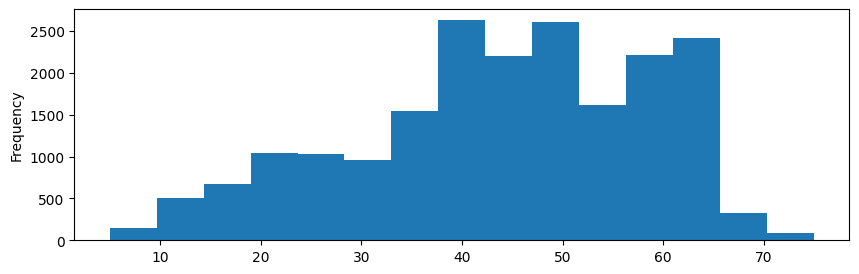

In [ ]:
amazon_df['price'].plot(kind='hist', figsize=(10, 3), bins=15);

**"Чему равен средний рейтинг и стандарное отклонение бюстгалтеров от Calvin-Klein?"**

Средний рейтинг:

In [ ]:
amazon_df[(amazon_df['brand_name'] == 'Calvin-Klein') & (amazon_df['product_category'] == 'Bras')]['rating'].mean()

4.105870093782563

Стандартное отклонение рейтинга:

In [ ]:
amazon_df[(amazon_df['brand_name'] == 'Calvin-Klein') & (amazon_df['product_category'] == 'Bras')]['rating'].std()

0.3432921164425877

И то и то одной строчкой:

In [ ]:
amazon_df[(amazon_df['brand_name'] == 'Calvin-Klein') & (amazon_df['product_category'] == 'Bras')]['rating'].agg(['mean', 'std'])

mean    4.105870
std     0.343292
Name: rating, dtype: float64

**"Насколько средняя цена бюстгалтеров в Victorias-Secret отличается от той же категории товаров в Wacoal?"**

In [ ]:
amazon_df[(amazon_df['brand_name'] == 'Victorias-Secret') & (amazon_df['product_category'] == 'Bras')]['price'].mean()

41.64153846153847

In [ ]:
amazon_df[(amazon_df['brand_name'] == 'Wacoal') & (amazon_df['product_category'] == 'Bras')]['price'].mean()

52.909899942590016

In [ ]:
vs_mean_price = amazon_df[(amazon_df['brand_name'] == 'Victorias-Secret') & (amazon_df['product_category'] == 'Bras')]['price'].mean()
wc_mean_price = amazon_df[(amazon_df['brand_name'] == 'Wacoal') & (amazon_df['product_category'] == 'Bras')]['price'].mean()

# Разница в средней цене
print(vs_mean_price - wc_mean_price)

-11.26836148105155


**"Какова средняя скидка на товары на Amazon, чья изначальная цена была от 30 до 50$?"**

Для начала вычислим скидку на товары, создав отдельный столбец в таблице. Скидку вычислим в виде процентов:

In [ ]:
amazon_df['mrp'] - amazon_df['price']

0         3.60
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
19995     0.00
19996     3.90
19997    16.76
19998     0.00
19999     6.01
Length: 20000, dtype: float64

In [ ]:
amazon_df['sale'] = amazon_df['mrp'] - amazon_df['price']
amazon_df.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,sale
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare,3.6
1,Wacoal Embrace Lace Bikini Panty,27.0,27.0,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large,0.0
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.0,65.0,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black,0.0
3,Hanky Panky Womens Signature Lace Retro V-Kini,36.0,36.0,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large,0.0
4,Wacoal Women's Red Carpet Strapless Bra,65.0,65.0,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan,0.0


In [ ]:
amazon_df['sale_percent'] = (amazon_df['sale'] / amazon_df['mrp']) * 100
amazon_df.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,sale,sale_percent
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare,3.6,10.0
1,Wacoal Embrace Lace Bikini Panty,27.0,27.0,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large,0.0,0.0
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.0,65.0,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black,0.0,0.0
3,Hanky Panky Womens Signature Lace Retro V-Kini,36.0,36.0,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large,0.0,0.0
4,Wacoal Women's Red Carpet Strapless Bra,65.0,65.0,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan,0.0,0.0


Теперь ответим на изначальный вопрос:

In [ ]:
amazon_df[(amazon_df['mrp'] > 30) & (amazon_df['mrp'] < 50)]['sale_percent'].mean()

8.965889475508146

**"Сколько уникальных цветов есть у бренда Wacoal?"**

In [ ]:
len(set(amazon_df[amazon_df['brand_name'] == 'Wacoal']['color']))

107

Для ответа на этот вопрос воспользуемся методом [`unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html), он возвращает список из уникальных значений в столбцах:

In [ ]:
len(amazon_df[amazon_df['brand_name'] == 'Wacoal']['color'].unique())

107

Для получения количества уникальных значений в столбце есть метод [`nunique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.nunique.html)

In [ ]:
amazon_df[amazon_df['brand_name'] == 'Wacoal']['color'].nunique()

107

**"Какой продукт Wacoal самый популярный по количеству отзывов в категории бюстгалтеры с рейтингом не ниже 4.5 либо стоимостью не выше 30$?"**

In [ ]:
amazon_df[
    (amazon_df['brand_name'] == 'Wacoal')
    & (amazon_df['product_category'] == 'Bras')
    & ((amazon_df['rating'] >= 4.5)
    | (amazon_df['price'] <= 30))
]['review_count'].max()

1859

In [ ]:
filtered_df = amazon_df[
    (amazon_df['brand_name'] == 'Wacoal')
    & (amazon_df['product_category'] == 'Bras')
    & ((amazon_df['rating'] >= 4.5)
    | (amazon_df['price'] <= 30))
]

product_idx = filtered_df['review_count'].argmax()

filtered_df.iloc[product_idx]

product_name                       Wacoal Women's Underwire Sport Bra
mrp                                                              65.0
price                                                           28.83
pdp_url             https://www.amazon.com/-/dp/B01GTNVSFM?th=1&psc=1
brand_name                                                     Wacoal
product_category                                                 Bras
retailer                                                    Amazon US
description         Sport bra offers great control, support and co...
rating                                                            4.3
review_count                                                     1859
style_attributes    [ 80% Nylon/ 20% Spandex/Elastane , Imported ,...
total_sizes         32C , 32D , 32DD , 32DDD , 32G , 32H , 34C , 3...
available_size      32D , 32DD , 32G , 32H , 34C , 34D , 34DD , 34...
color                                                   Teaberry/Gray
sale                